In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler


In [215]:
data = pd.read_csv('../data/raw/telco.csv')

In [216]:
data.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [219]:
data.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174



**EDA & Visualization**

Text(0.5, 1.0, 'Distribution of Churn')

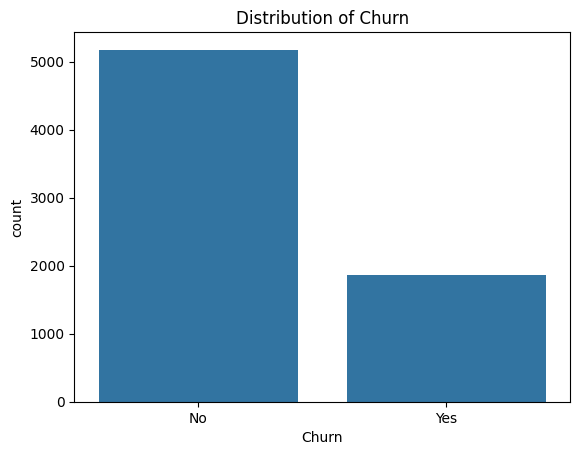

In [220]:
sns.countplot(x='Churn', data=data)

plt.title('Distribution of Churn')

<Axes: xlabel='Churn', ylabel='tenure'>

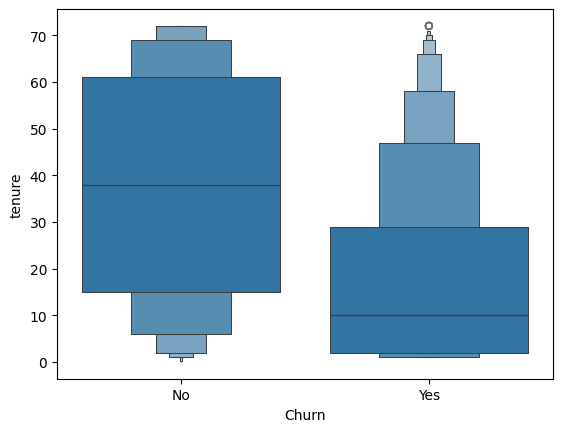

In [221]:
sns.boxenplot(x='Churn', y='tenure', data=data)

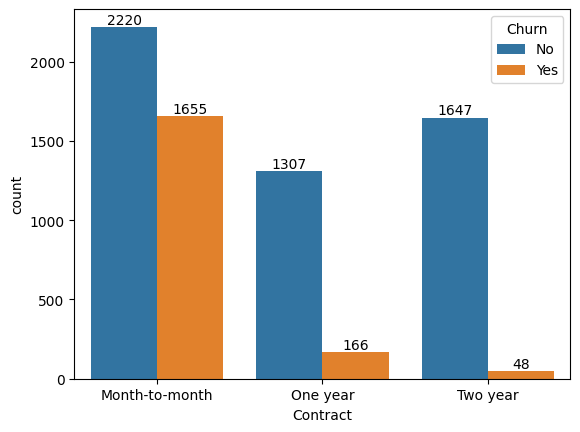

In [222]:
c = sns.countplot(data=data, x='Contract', hue='Churn')  
for i in c.containers:
    c.bar_label(i)  

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

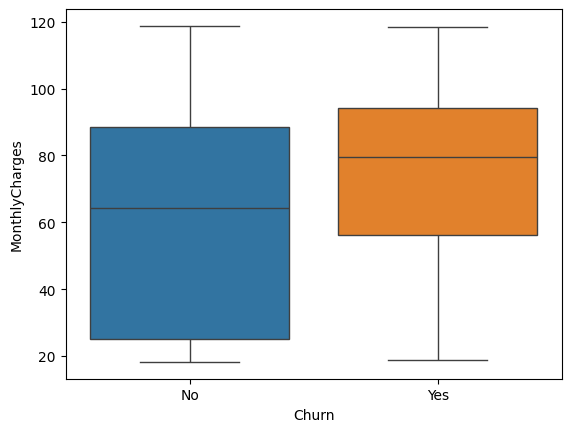

In [223]:
sns.boxplot(x='Churn', y='MonthlyCharges',hue='Churn', data=data)

<Axes: xlabel='InternetService', ylabel='count'>

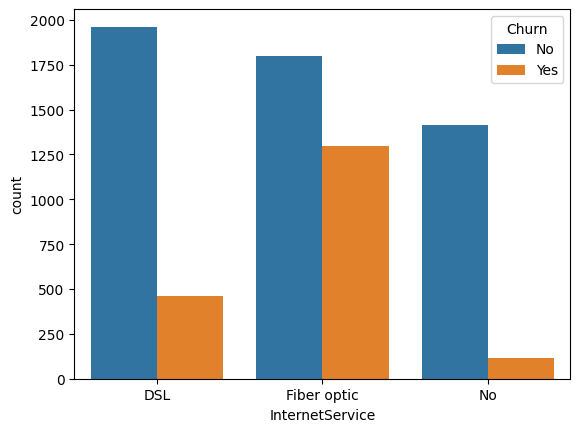

In [224]:
sns.countplot(x='InternetService',hue='Churn', data=data)

<Axes: xlabel='PaymentMethod', ylabel='count'>

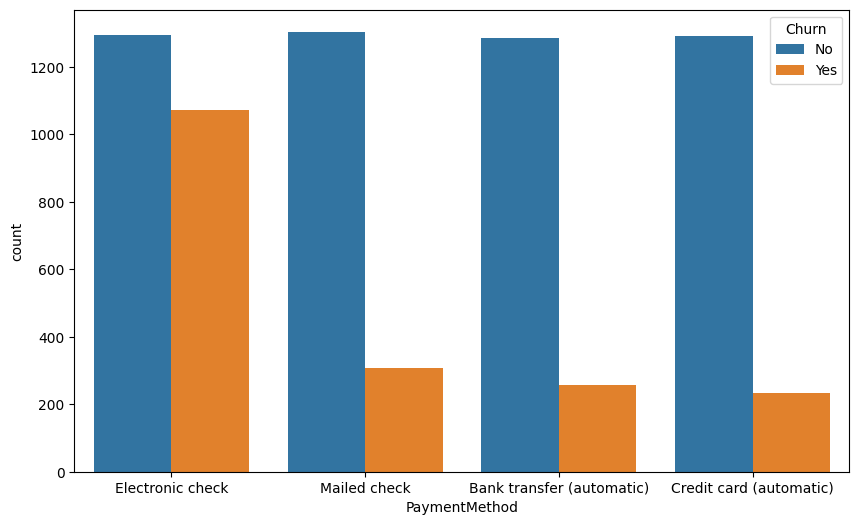

In [225]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue = 'Churn', data=data)

**Preprocessing and Feature Selection**

In [226]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [227]:
data['TotalCharges'].isna().sum()

np.int64(11)

In [228]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
data['TotalCharges'].isna().sum()


np.int64(0)

In [229]:
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

In [230]:
data.head()
data[['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']] = data[['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']].applymap(lambda x: 1 if x == 'Yes' else 0)  


/var/folders/_m/17kdhfhx7k1cq3r3btc5p5440000gn/T/ipykernel_3856/123325604.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']] = data[['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']].applymap(lambda x: 1 if x == 'Yes' else 0)


In [231]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [232]:
cat_cols = [
    'gender',
    'MultipleLines',
    'InternetService',
    'Contract',
    'PaymentMethod'
]
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   OnlineBackup                           7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

In [234]:
data.drop('customerID', axis=1, inplace=True)

In [235]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [236]:
data.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year   

<Axes: >

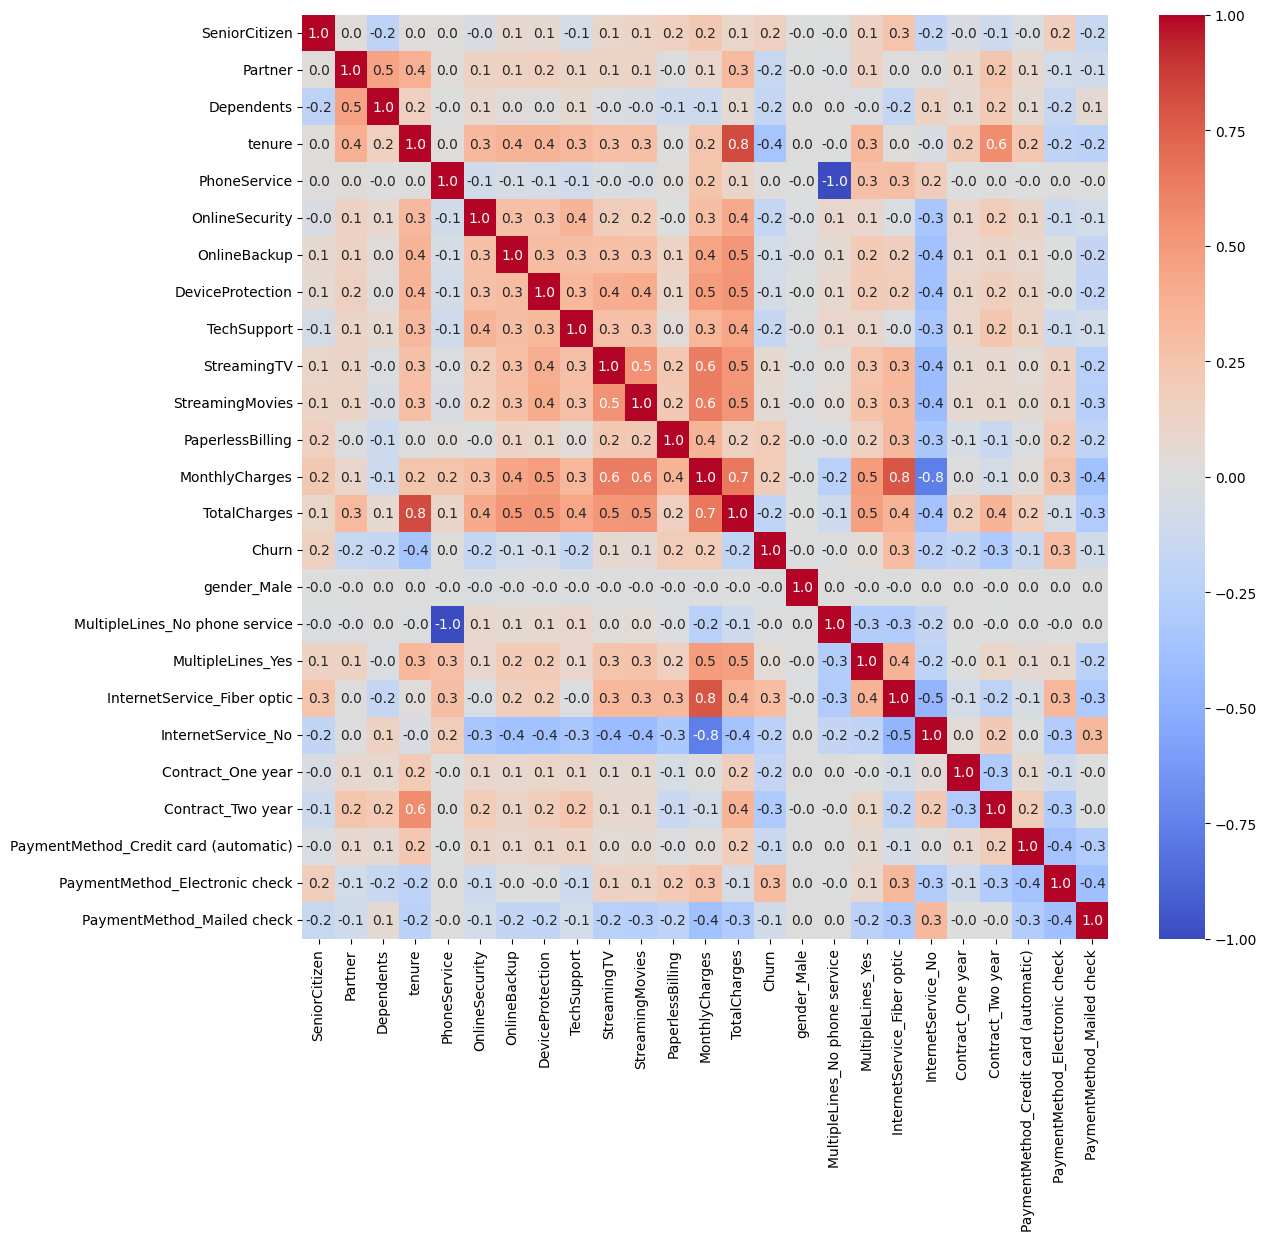

In [237]:
plt.figure(figsize=(13,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f')

**Train and test split**


In [238]:
X = data.drop("Churn", axis=1)
y = data["Churn"]



In [239]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Train model with Random Forest**

In [240]:
R_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  max_depth=5, min_samples_split=50,
                                  min_samples_leaf=20,
                                  class_weight='balanced')     
R_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [241]:
R_scor = roc_auc_score(y_test, R_model.predict_proba(X_test)[:,1])
claRep = classification_report(y_test, R_model.predict(X_test))
print(f"Random Forest AUC: {R_scor}")
print(claRep)

Random Forest AUC: 0.8426554548037923
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



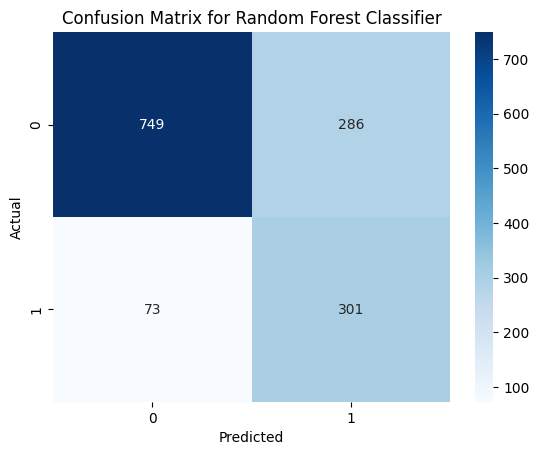

In [242]:
confusion_matrix(y_test, R_model.predict(X_test))
sns.heatmap(confusion_matrix(y_test, R_model.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**Train model with Decision Tree**

In [243]:
T_model = DecisionTreeClassifier(random_state=42
                                ,max_depth=5,
                                 min_samples_split=50,
                                 min_samples_leaf=20,
                                 criterion='gini',
                                 class_weight='balanced'
                                 )
T_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [244]:
eat_imp = pd.Series(
    T_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

round(eat_imp.head(10),3)

Contract_Two year                 0.406
Contract_One year                 0.254
InternetService_Fiber optic       0.112
tenure                            0.098
StreamingMovies                   0.035
TotalCharges                      0.025
MonthlyCharges                    0.019
PaymentMethod_Electronic check    0.019
InternetService_No                0.015
PhoneService                      0.012
dtype: float64

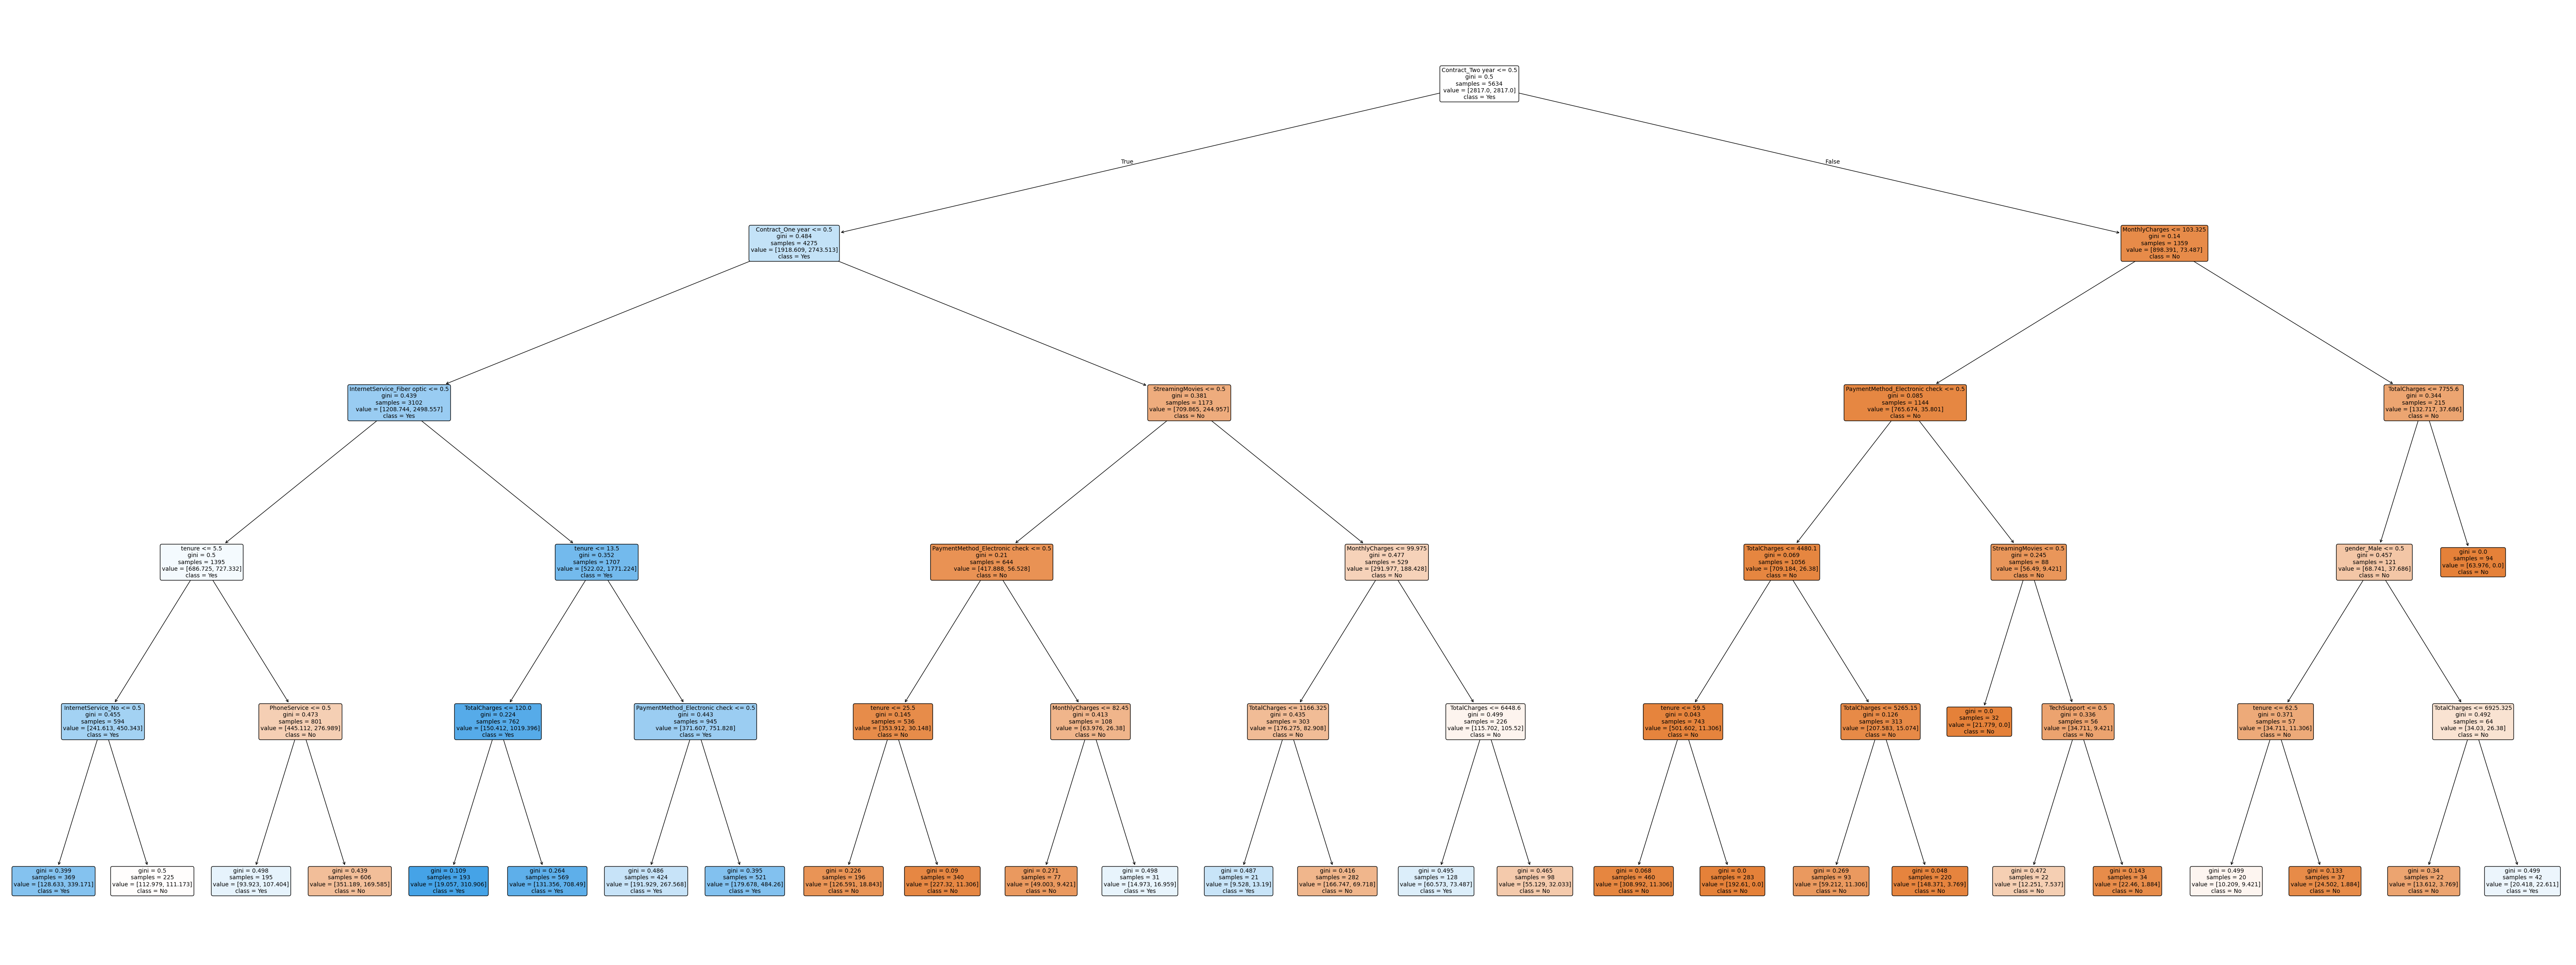

In [245]:
plt.figure(figsize=(80,30))
tree.plot_tree(
    T_model,
    feature_names=X_train.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

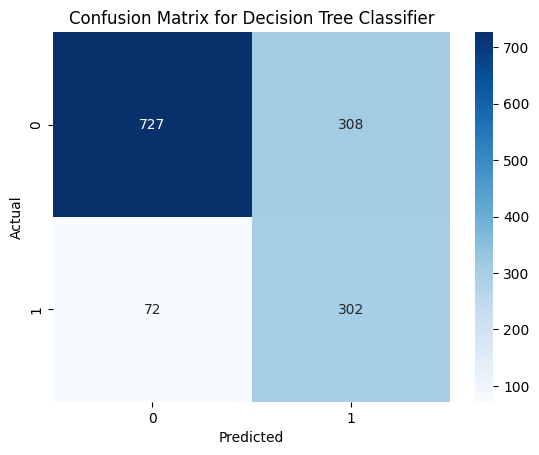

In [246]:
cm = confusion_matrix(y_test, T_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [247]:
print(f"roc_auc_score {roc_auc_score(y_test, T_model.predict(X_test))}")
print(classification_report(y_test, T_model.predict(X_test))) 

roc_auc_score 0.7549510449766205
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.81      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



**Train model with LogisticRegression**


In [248]:
standardized_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [249]:
scaler = StandardScaler()
X_train[standardized_cols] = scaler.fit_transform(X_train[standardized_cols])
X_test[standardized_cols]  = scaler.transform(X_test[standardized_cols])

In [250]:

LR_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
LR_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [251]:
coef = pd.Series(
    LR_model.coef_[0],
    index=X_train.columns
).sort_values(key=abs, ascending=False)
round(coef.head(15),3)

Contract_Two year                -1.414
tenure                           -1.147
InternetService_No               -1.080
InternetService_Fiber optic       1.045
Contract_One year                -0.719
TotalCharges                      0.476
PaymentMethod_Electronic check    0.401
PhoneService                     -0.375
OnlineSecurity                   -0.368
StreamingMovies                   0.350
PaperlessBilling                  0.336
MonthlyCharges                   -0.324
StreamingTV                       0.324
TechSupport                      -0.303
MultipleLines_Yes                 0.288
dtype: float64

In [252]:
y_pred = LR_model.predict_proba(X_test)[:,1]
print(f"LR - roc_auc_score {roc_auc_score(y_test, y_pred)}")

LR - roc_auc_score 0.8418042315740525


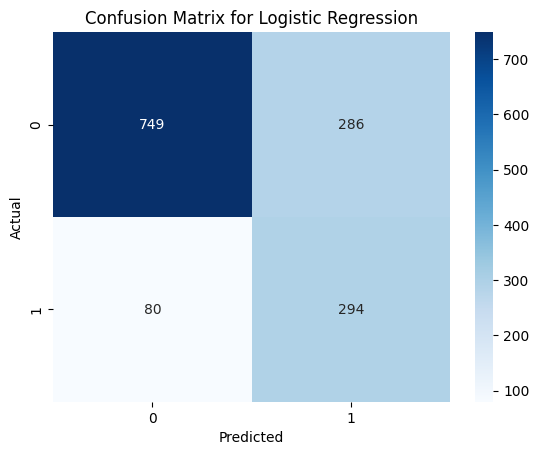

In [253]:
sns.heatmap(confusion_matrix(y_test, LR_model.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()